## Observations and Insights 

1. The sex distribution shows that the number of male and female mice are almost the same, it is a great way to eliminate any huge effects against sex over this experiment.

2. The 'Correlation and Regression' part of the Capomulin effects on different mouse weight shows a strong correlated coefficient value of 0.84, i.e. the heavier the weight, the higher tumor it has. It worth to find about other factors such as age, sex etc. over each different drug regimen to further study on this experiment.

3. There are 130 mice which have 10 values of Tumor volume at each timepoint, whereas 118 mice have incompleted values of tumore volume. This will affect when analysing tests which based on 'Tumor volume at final timepoint', 'averge tumor volume' etc., giving the fact that for different drug regimen, the tumor volume are greatly different.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

%matplotlib inline
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

df = pd.merge(mouse_metadata,study_results,on='Mouse ID',how = 'outer')


# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(df['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

df[df.duplicated(['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

df.loc[df['Mouse ID'] == 'g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

df2 = df.loc[df['Mouse ID'] != 'g989'].reset_index(drop = True)

df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

len(df2['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

dr_means = df2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean().round(3)

dr_medians = df2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median().round(3)

dr_var = df2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var().round(3)

dr_stdev = df2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std().round(3)

dr_sem = df2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem().round(3)

df_list = [dr_means,dr_medians,dr_var,dr_stdev,dr_sem]

df3 = pd.concat(df_list, join='outer',axis=1)

df3.columns = ['mean','median','variance','standard_deviation','SEM']

df3

,mean,median,variance,standard_deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

df4 = df2.groupby(['Drug Regimen']).agg(mean = ('Tumor Volume (mm3)',np.mean),
                                       median = ('Tumor Volume (mm3)',np.median),
                                       variance = ('Tumor Volume (mm3)',np.var),
                                       standard_deviation = ('Tumor Volume (mm3)',np.std),
                                       SEM = ('Tumor Volume (mm3)',st.sem)).round(3)

df4


,mean,median,variance,standard_deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

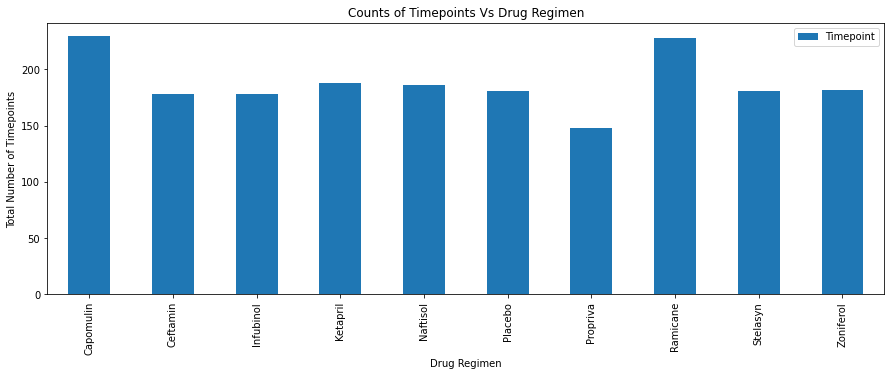

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

df5 = pd.DataFrame(df2.groupby(['Drug Regimen'])['Timepoint'].count())

df_bar = df5.plot(kind='bar',figsize=(15,5));

df_bar.set_ylabel('Total Number of Timepoints')

df_bar.set_title('Counts of Timepoints Vs Drug Regimen')

plt.show()


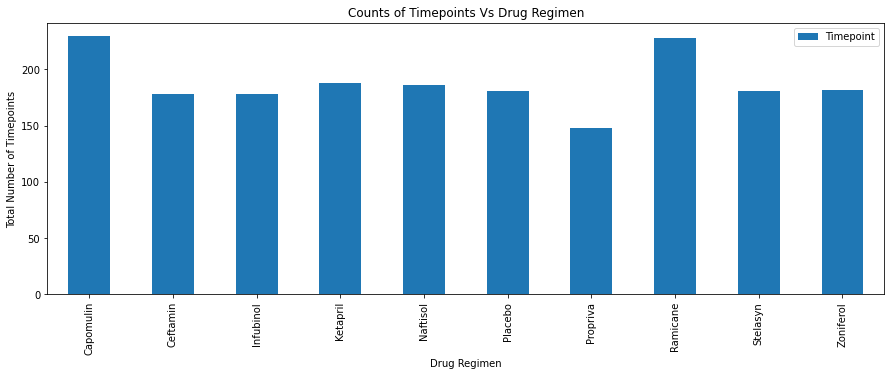

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(df2['Drug Regimen'].unique()))
y_value = df5['Timepoint']

plt.figure(figsize=(15,5))
plt.bar(x_axis,y_value,align = 'center', width = 0.5);

tick_location = [value for value in x_axis]
plt.xticks(tick_location,list(df5.index),rotation = 'vertical')

plt.xlim(-0.5,len(x_axis)-0.5)

plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Timepoints')
plt.title('Counts of Timepoints Vs Drug Regimen')

plt.legend(['Timepoint'],loc = 'upper right')

plt.show()

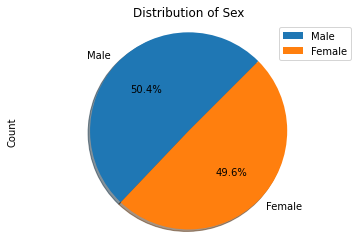

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

df6 = pd.DataFrame(df2.groupby(['Mouse ID']).first()['Sex'].value_counts()).rename(columns={'Sex':'Count'})

df_pie = df6.plot(kind='pie', y = 'Count', autopct = '%1.1f%%', shadow = True, startangle = 45);


df_pie.set_title('Distribution of Sex')
plt.axis('equal')
plt.show()

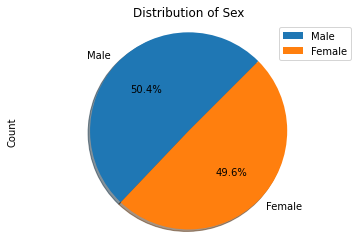

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

py_pie_value = df6['Count']
py_pie_label = list(df6.index)

plt.pie(py_pie_value, labels = py_pie_label, autopct='%1.1f%%',shadow=True,startangle=45)

plt.title('Distribution of Sex')
plt.ylabel('Count')
plt.legend(list(df6.index),loc = 'upper right')

plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
df7 = df2.sort_values(['Mouse ID','Timepoint'],ascending=False)

#Easy Method: df7.drop_duplicates(subset=['Mouse ID'])

df8 = pd.DataFrame(df7.groupby('Mouse ID')['Tumor Volume (mm3)'].first()).reset_index().rename(columns={'Tumor Volume (mm3)':'Final Tumor'})



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

df9 = pd.merge(df2,df8,on=['Mouse ID'],how='inner')

df10 = df9.loc[df9['Tumor Volume (mm3)'] == df9['Final Tumor']]

four_drug = ['Capomulin','Ramicane','Infubinol','Ceftamin']

df11 = df10.loc[df10['Drug Regimen'].isin(four_drug)].drop(['Final Tumor'],1).reset_index(drop = True)

df11['Tumor Volume (mm3)'] = df11['Tumor Volume (mm3)'].round(3)

df11

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050,1
1,s185,Capomulin,Female,3,17,45,23.344,1
2,x401,Capomulin,Female,16,15,45,28.484,0
3,m601,Capomulin,Male,22,17,45,28.431,1
4,g791,Ramicane,Male,11,16,45,29.128,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.387,3
96,y163,Infubinol,Female,17,27,45,67.686,3
97,y769,Ceftamin,Female,6,27,45,68.595,4
98,y865,Ceftamin,Male,23,26,45,64.730,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

four_drug

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

for drug in four_drug:
    
    df12 = df11.loc[df11['Drug Regimen'] == drug]
    
    values = df12['Tumor Volume (mm3)']
    
    tumor_vol.append(values)
    
    # add subset 
    
    quantiles = values.quantile([0.25,0.5,0.75])
    lower_q = quantiles[0.25]
    upper_q = quantiles[0.75]
    iqr = upper_q - lower_q
    
    
    # Determine outliers using upper and lower bounds
    
    lower_bound = lower_q - (1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)
    
    outliers = df12.loc[(df12['Tumor Volume (mm3)']>upper_bound)|(df12['Tumor Volume (mm3)']<lower_bound)][['Mouse ID','Tumor Volume (mm3)']]
    
    
        
    print(f'IQR for {drug} is {iqr}')
    print(f'Median for {drug} is {quantiles[0.5]}')
    
    if len(outliers) == 0:
        print(f'outliers for {drug} is none, which is either below {lower_bound} or above {upper_bound}')
    
    else:
        print(f'outliers for {drug} is {outliers.values}, which is either below {lower_bound} or above {upper_bound}')

    
    
    

IQR for Capomulin is 7.7819999999999965
Median for Capomulin is 38.125
outliers for Capomulin is none, which is either below 20.704000000000008 or above 51.831999999999994
IQR for Ramicane is 9.099
Median for Ramicane is 36.562
outliers for Ramicane is none, which is either below 17.911499999999997 or above 54.3075
IQR for Infubinol is 11.476999999999997
Median for Infubinol is 60.165
outliers for Infubinol is [['c326' 36.321]], which is either below 36.8335 or above 82.74149999999999
IQR for Ceftamin is 15.577999999999996
Median for Ceftamin is 59.852
outliers for Ceftamin is none, which is either below 25.355000000000008 or above 87.66699999999999


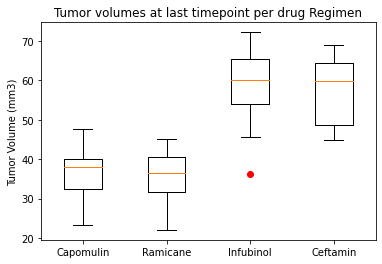

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_vol, sym= 'red')


plt.xticks([1,2,3,4],list(four_drug))
plt.title('Tumor volumes at last timepoint per drug Regimen')
plt.ylabel('Tumor Volume (mm3)');

## Line and Scatter Plots

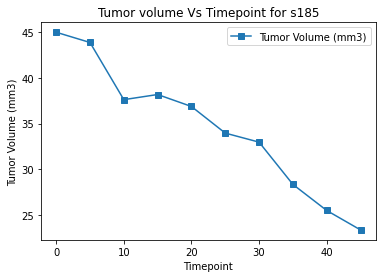

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

df13 = df2.loc[df2['Drug Regimen'] == 'Capomulin']

df14 = df2.loc[df2['Mouse ID'] == 's185']

s185_plot = df14.plot(kind='line', x='Timepoint',y='Tumor Volume (mm3)',marker='s')

s185_plot.set_ylabel('Tumor Volume (mm3)')

s185_plot.set_title('Tumor volume Vs Timepoint for s185')

plt.show()

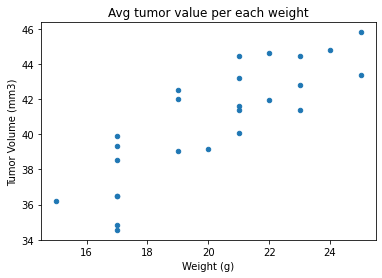

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

df15 = df13.groupby(['Mouse ID'])[['Tumor Volume (mm3)','Weight (g)']].mean()

cap_plot = df15.plot(kind='scatter', x = 'Weight (g)', y = 'Tumor Volume (mm3)')

cap_plot.set_title('Avg tumor value per each weight');


## Correlation and Regression

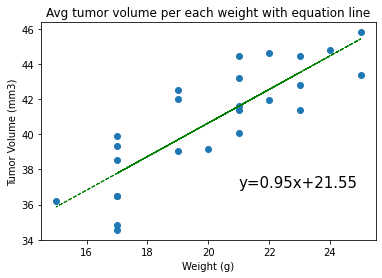

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

r = st.pearsonr(df15['Weight (g)'],df15['Tumor Volume (mm3)'])

x_values = df15['Weight (g)']
y_values = df15['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stedrr) = st.linregress(x_values,y_values)

line_eq = 'y='+str(round(slope,2))+'x+'+str(round(intercept,2))

regress_value = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_value,'g--',linewidth = 1)

plt.title('Avg tumor volume per each weight with equation line')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.annotate(line_eq,(21,37),fontsize = '15');